In [1]:
import os
import sys
import glob
import re
import ast
import warnings

import csv
import json
import pickle

import math
import random
import numpy as np
import scipy as sp
import datetime as dt
import pandas as pd
import swifter
from scipy.stats import gaussian_kde
from scipy.integrate import quad

import portion as P
import itertools as it
import copy
from tqdm.notebook import tqdm
from collections import namedtuple
from pprint import pprint
from pytictoc import TicToc

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display options
# pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
%config InlineBackend.figure_format = 'retina'

# Set plot style
# plt.style.use('ggplot')

In [9]:
def plot_test(data, downsampled_data) -> bool:

    fig, ax = plt.subplots(figsize=(6, 4))
    
    t = TicToc()
    t.tic()
    kde = gaussian_kde(data)
    x = np.linspace(min(data), max(data), 1000)
    density = kde(x)
    ax.fill_between(x, density, label='original', color='tab:blue', alpha=0.45)
    t.toc()
    
    t = TicToc()
    t.tic()
    kde = gaussian_kde(downsampled_data)
    x = np.linspace(min(downsampled_data), max(downsampled_data), 1000)
    density = kde(x)
    ax.fill_between(x, density, label='downsampled', color='tab:pink', alpha=0.45)
    t.toc()
    
    ax.legend()
    
    plt.gcf().autofmt_xdate()
    plt.show()
    

def median_downsample(data, sample_size):
    """
    中位數下採樣函數
    
    Args:
    data: 原始數據的列表
    sample_size: 下採樣後的樣本大小
    
    Returns:
    downsampled_data: 下採樣後的數據列表
    """
    chunk_size = len(data) // sample_size
    if chunk_size == 0:
        return data
    downsampled_data = []
    for i in range(0, len(data), chunk_size):
        chunk = data[i:i+chunk_size]
        median_index = len(chunk) // 2
        median_value = np.median(chunk)
        downsampled_data.append(median_value)
    return downsampled_data


def mean_downsample(data, sample_size):
    """
    平均下採樣函數
    
    Args:
    data: 原始數據的列表
    sample_size: 下採樣後的樣本大小
    
    Returns:
    downsampled_data: 下採樣後的數據列表
    """
    chunk_size = len(data) // sample_size
    if chunk_size == 0:
        return data
    downsampled_data = [sum(data[i:i+chunk_size]) / chunk_size for i in range(0, len(data), chunk_size)]
    return downsampled_data

# 生成雙峰分佈的隨機數
def bimodal_dist(mean1=-5, std1=1, mean2=5, std2=1, size=10000):
    data1 = np.random.normal(mean1, std1, size // 2)
    data2 = np.random.normal(mean2, std2, size // 2)
    data = np.concatenate((data1, data2))
    # 將數據限制在 -10 到 10 之間
    data = np.clip(data, -10, 10)
    return data, (mean1, std1, mean2, std2, size)

----------------------------------------------------------------
(-5, 1, 1, 2, 6869)
Elapsed time is 0.068793 seconds.
Elapsed time is 0.059632 seconds.


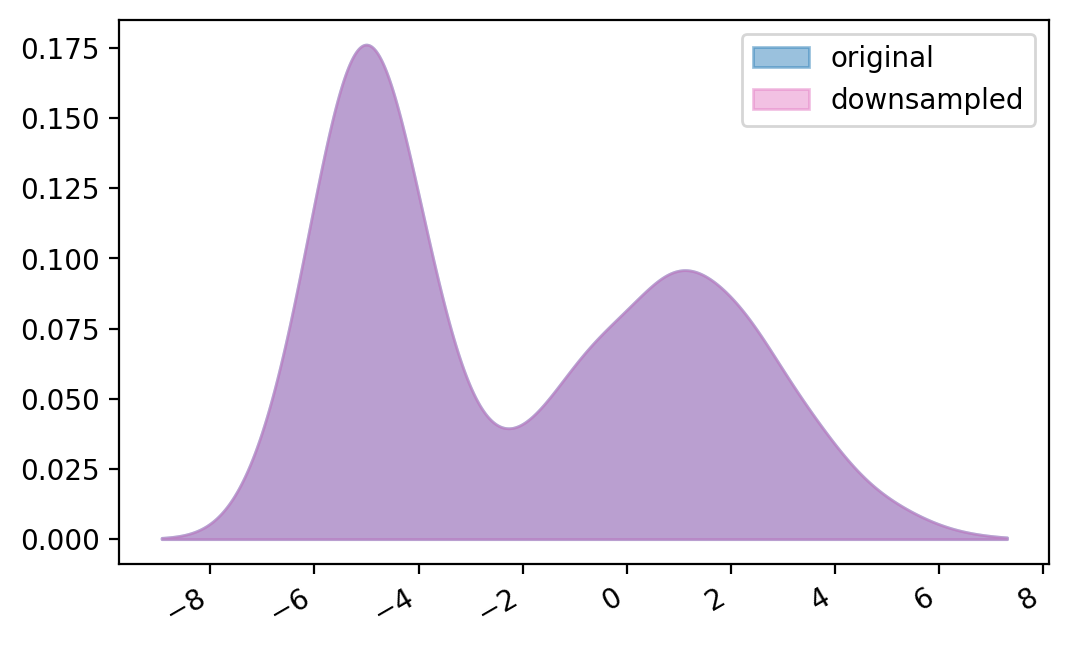

Elapsed time is 0.061674 seconds.
Elapsed time is 0.059818 seconds.


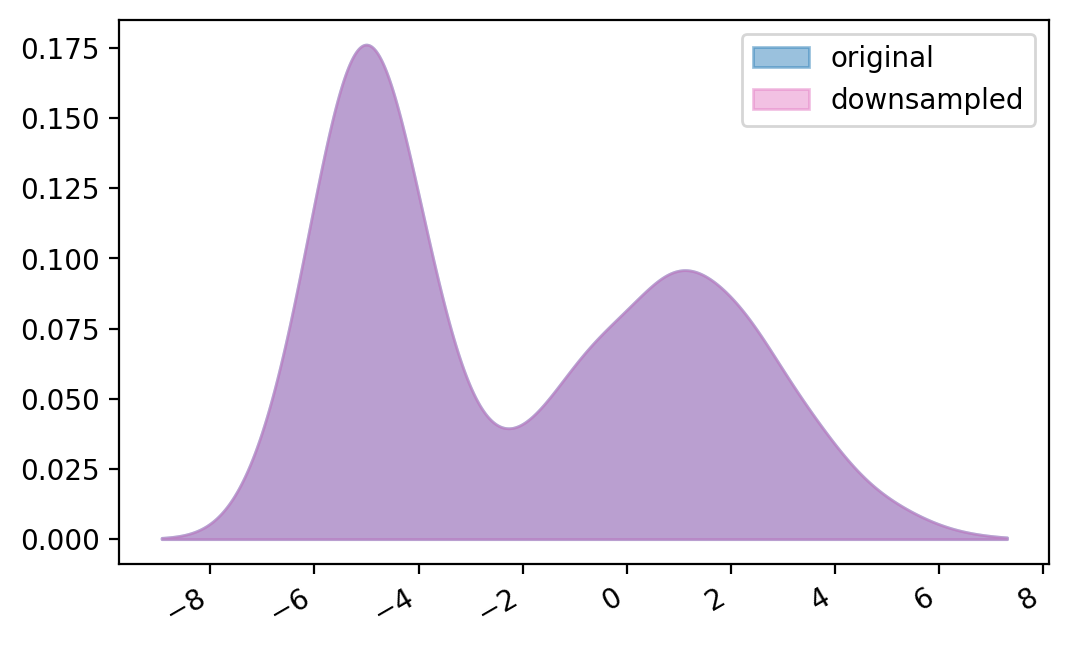

----------------------------------------------------------------
(-1, 1, 3, 1, 15314)
Elapsed time is 0.193401 seconds.
Elapsed time is 0.095473 seconds.


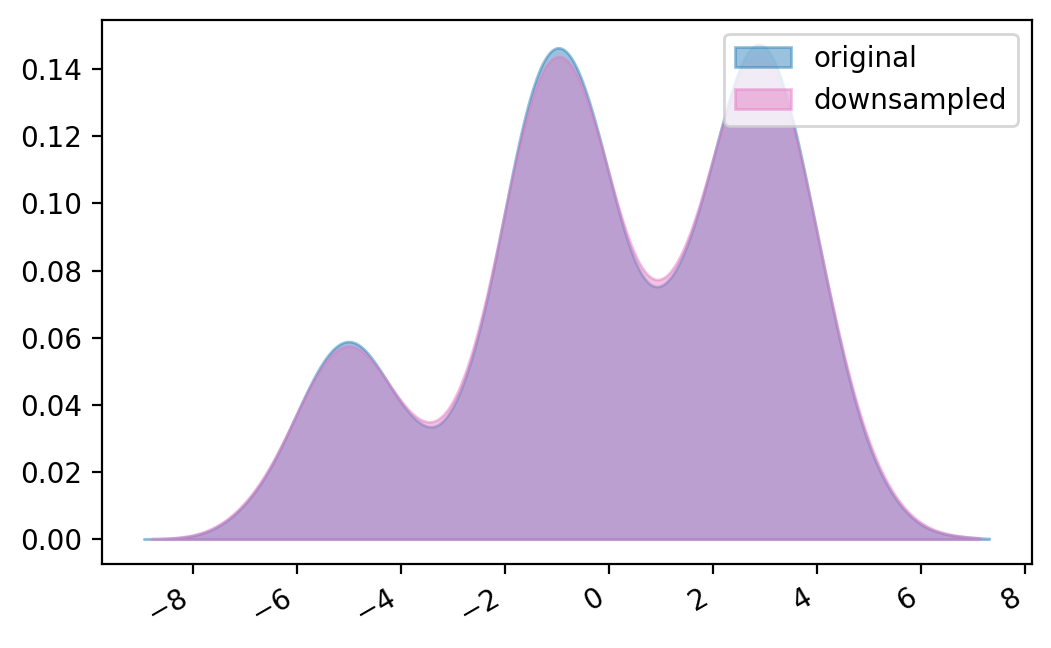

Elapsed time is 0.191580 seconds.
Elapsed time is 0.095613 seconds.


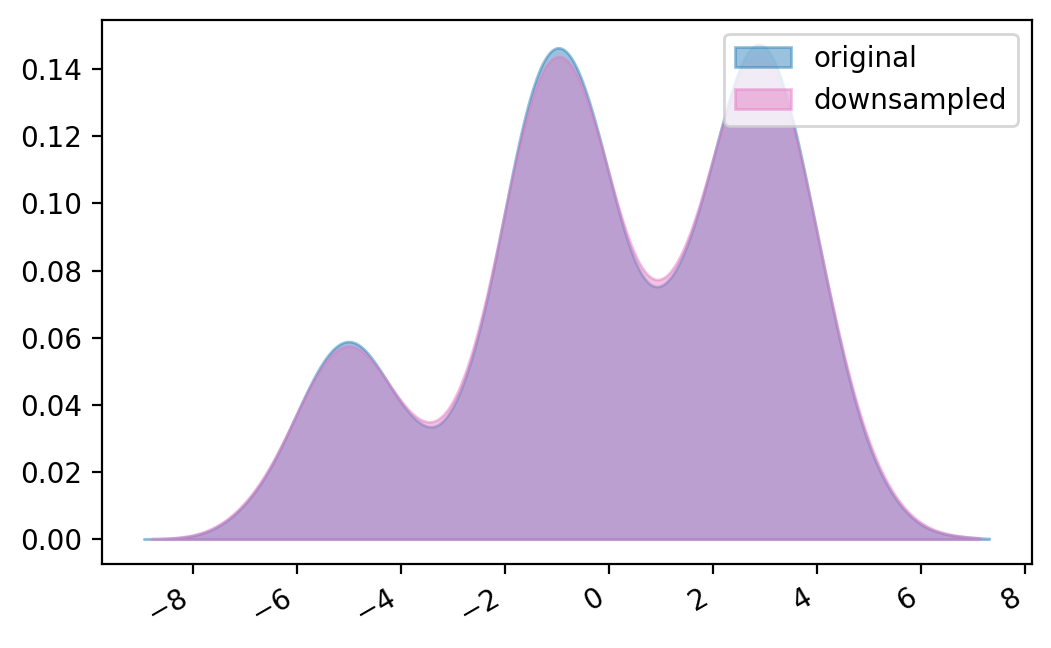

----------------------------------------------------------------
(-3, 1, 4, 2, 15259)
Elapsed time is 0.323080 seconds.
Elapsed time is 0.117047 seconds.


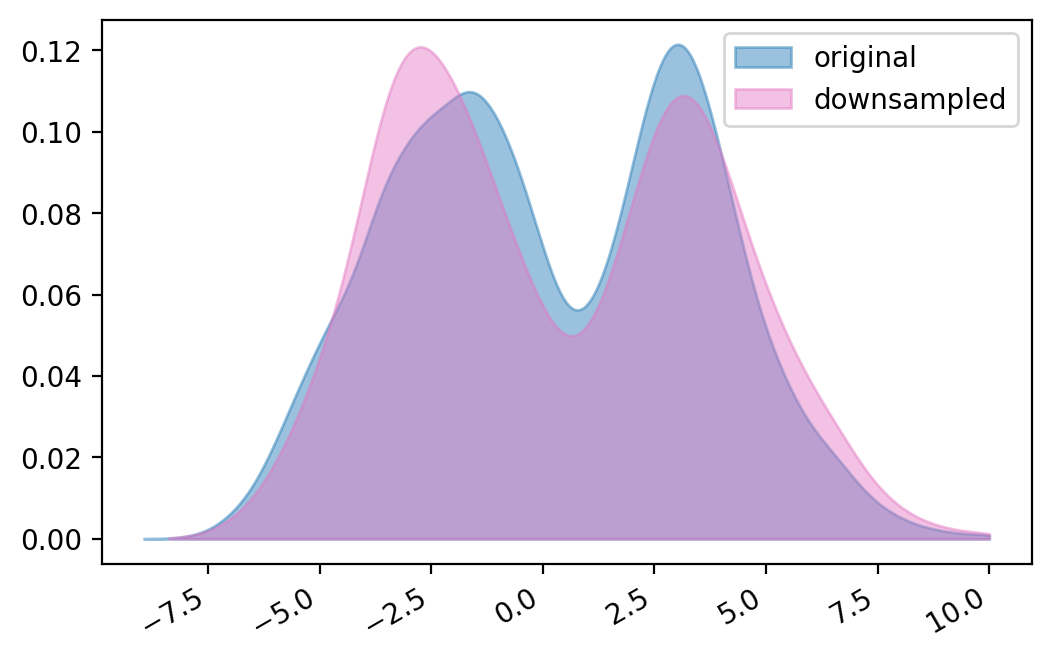

Elapsed time is 0.320974 seconds.
Elapsed time is 0.115089 seconds.


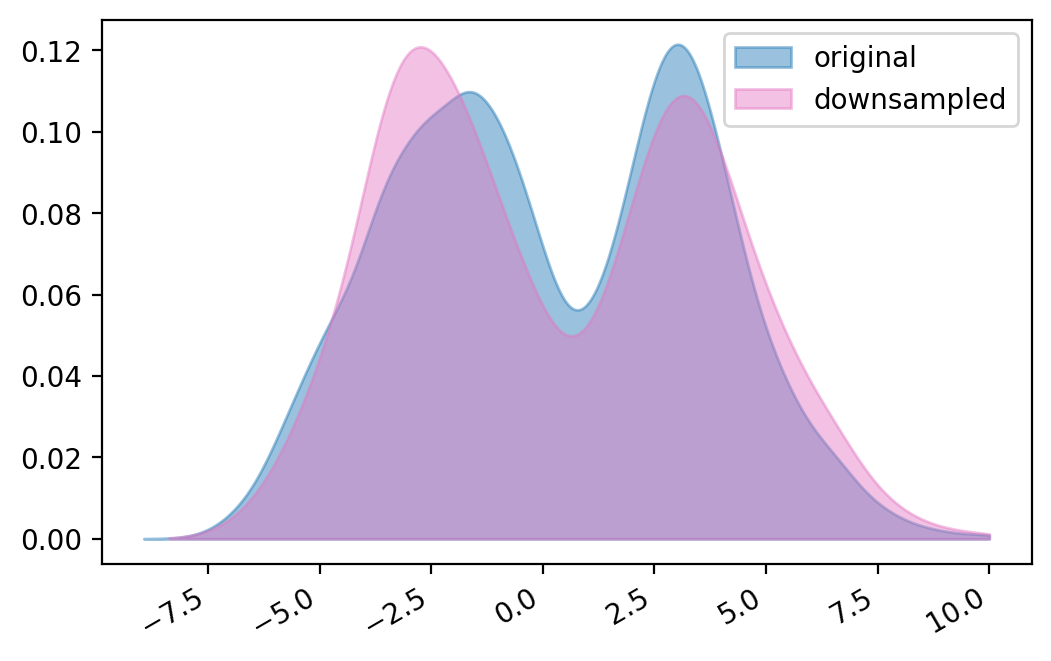

----------------------------------------------------------------
(-5, 1, 3, 2, 8492)
Elapsed time is 0.389427 seconds.
Elapsed time is 0.094138 seconds.


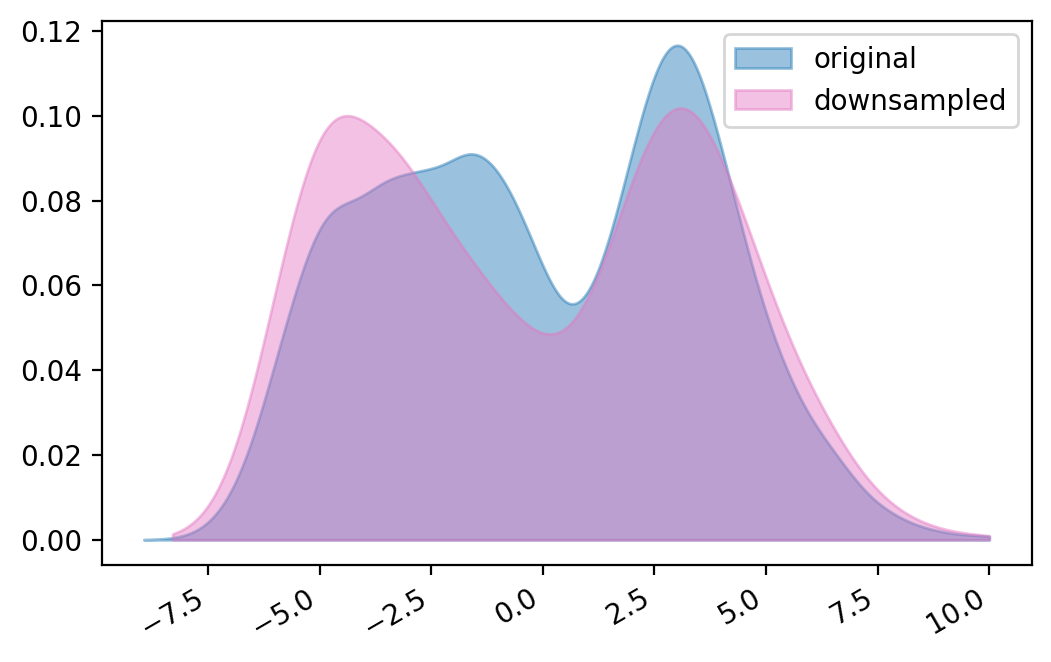

Elapsed time is 0.390486 seconds.
Elapsed time is 0.096014 seconds.


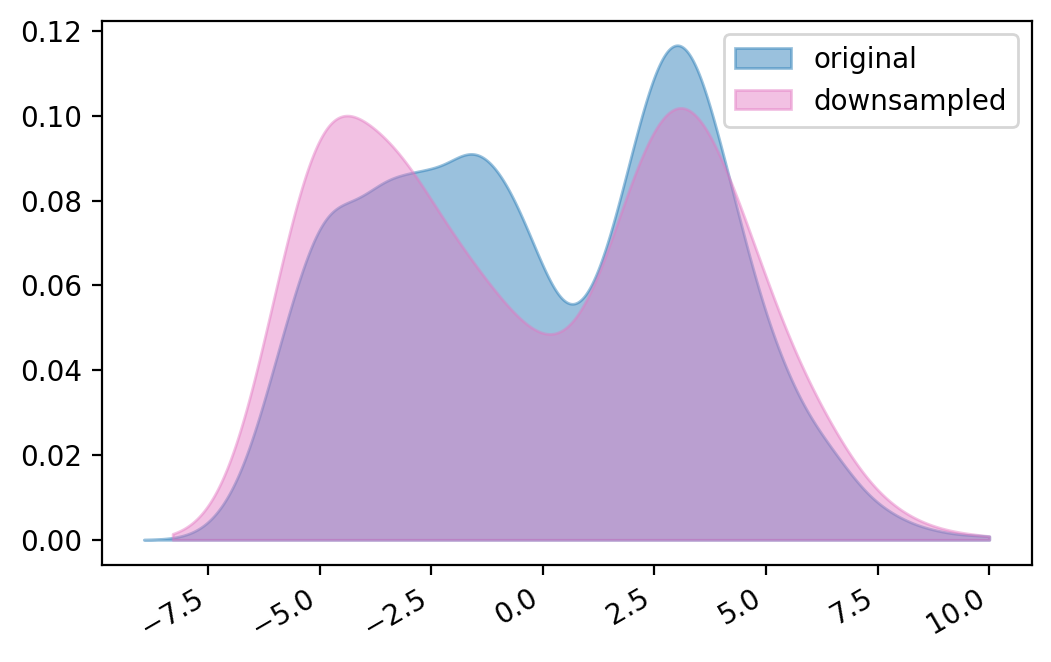

----------------------------------------------------------------
(-3, 1, 4, 2, 7776)
Elapsed time is 0.458093 seconds.
Elapsed time is 0.159189 seconds.


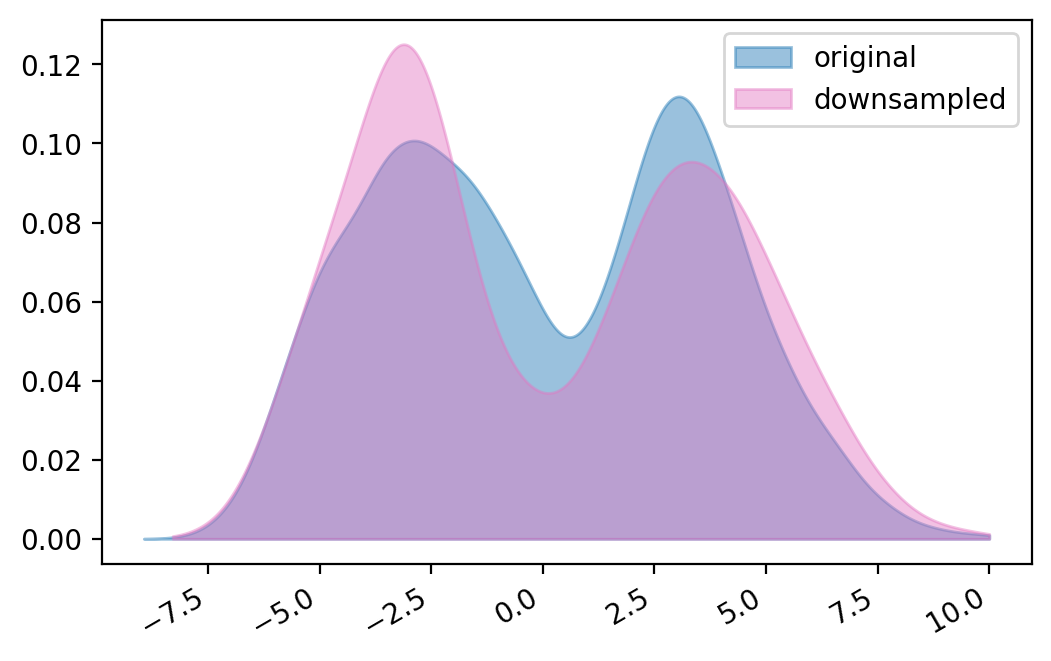

Elapsed time is 0.456699 seconds.
Elapsed time is 0.166101 seconds.


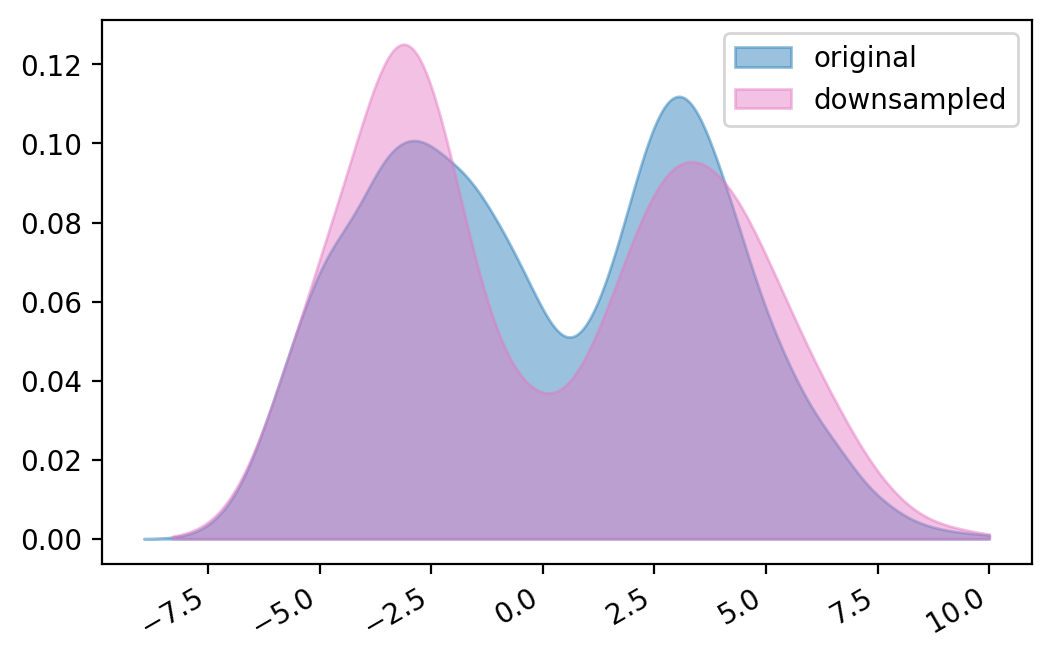

----------------------------------------------------------------
(-4, 2, 1, 1, 7648)
Elapsed time is 0.518889 seconds.
Elapsed time is 0.113604 seconds.


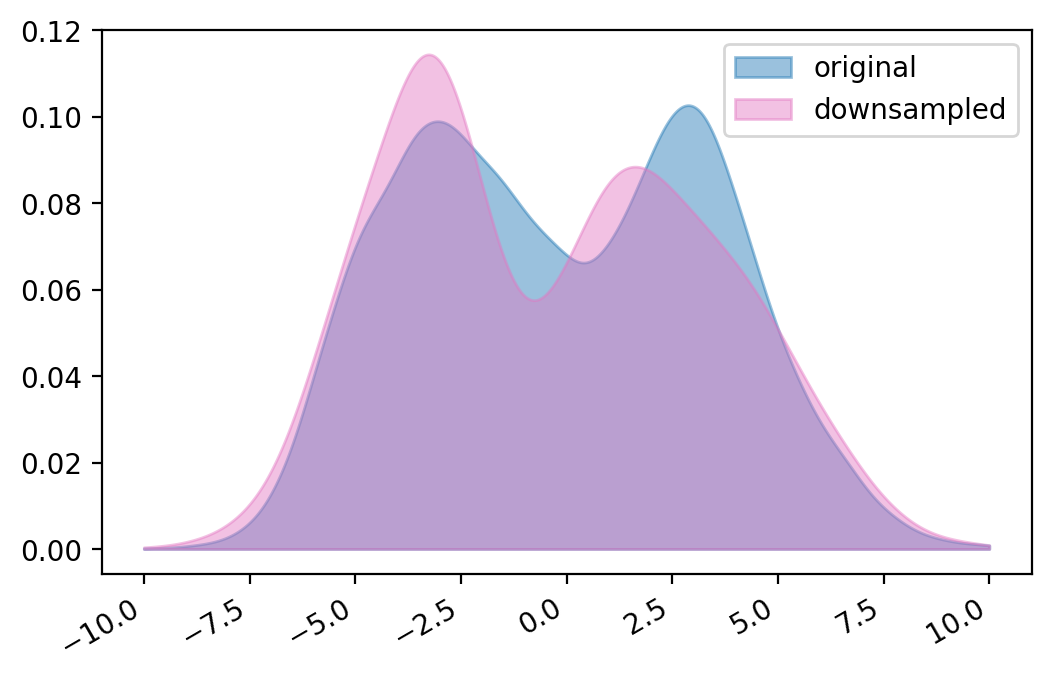

Elapsed time is 0.520237 seconds.
Elapsed time is 0.114504 seconds.


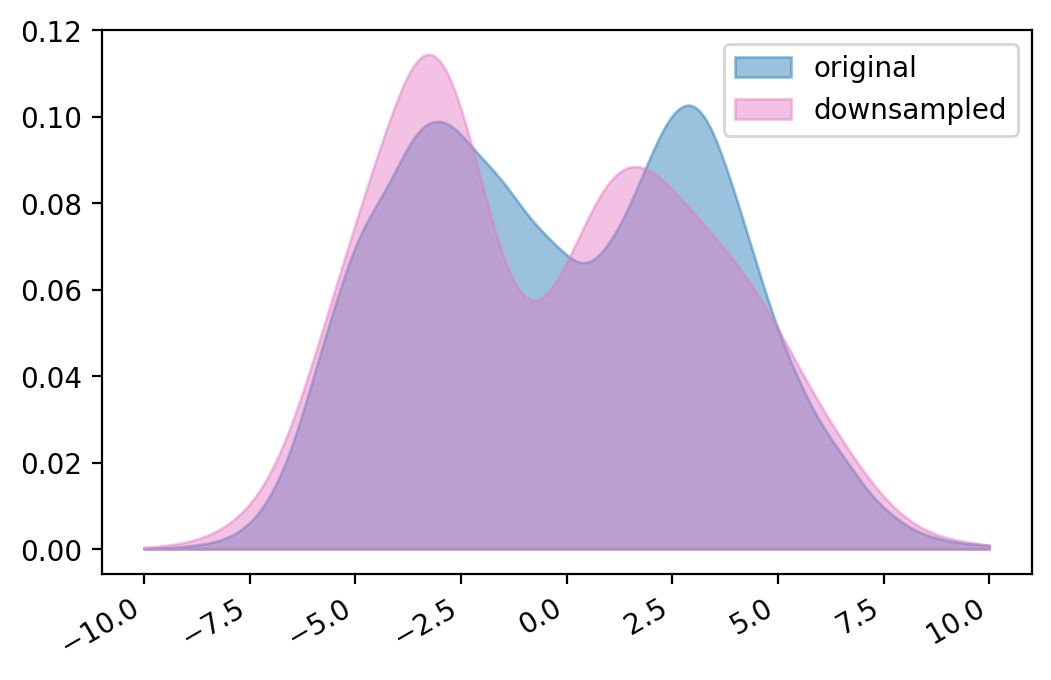

----------------------------------------------------------------
(-3, 1, 5, 2, 16006)
Elapsed time is 0.652236 seconds.
Elapsed time is 0.126522 seconds.


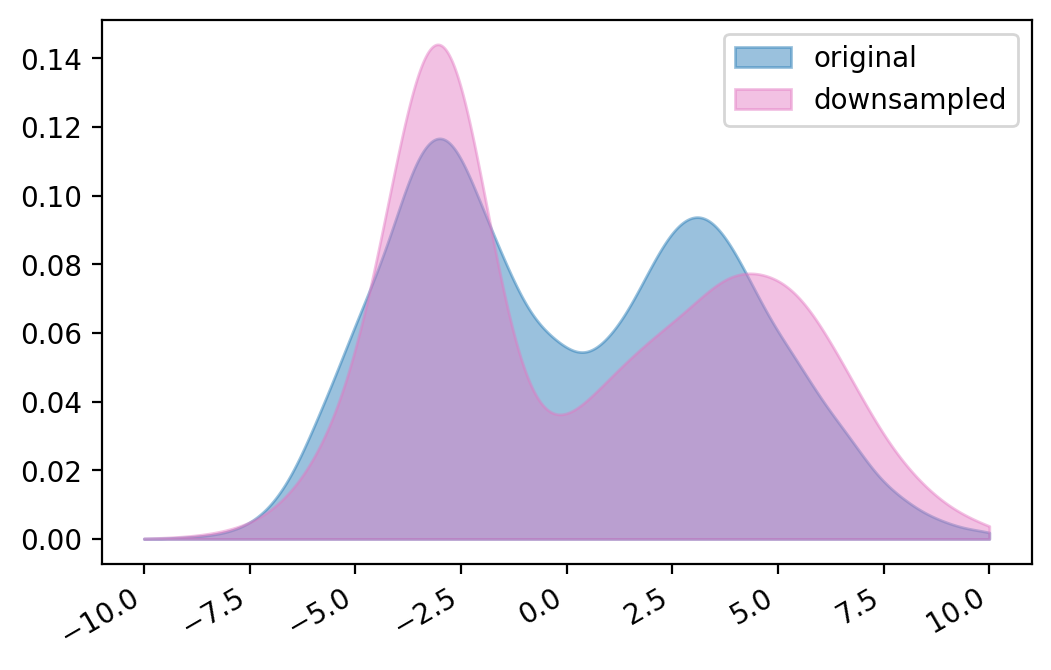

Elapsed time is 0.652767 seconds.
Elapsed time is 0.126299 seconds.


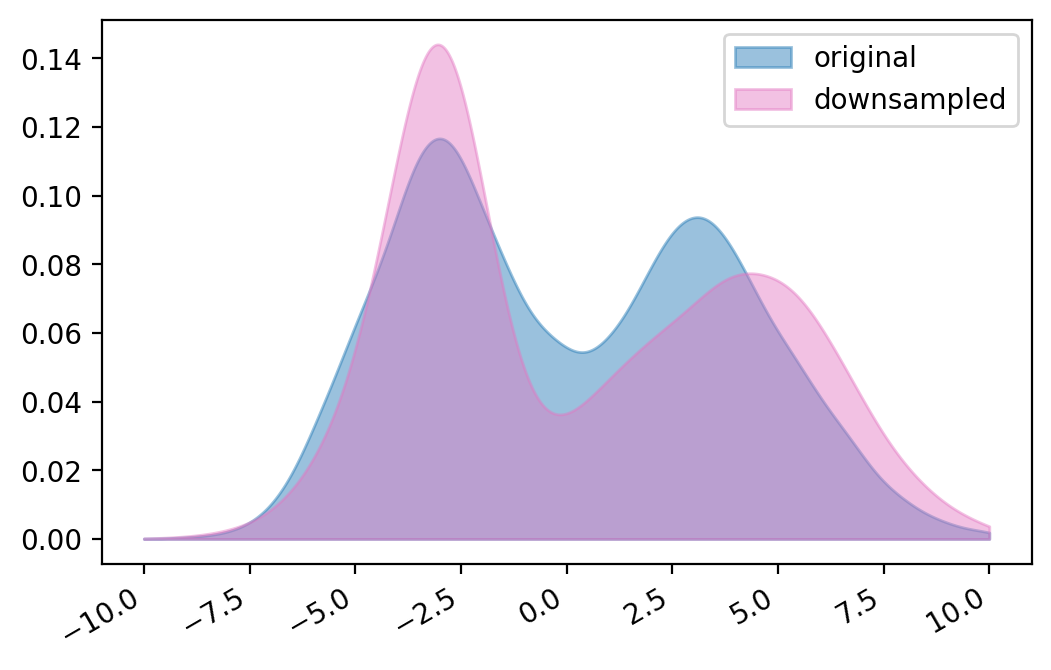

----------------------------------------------------------------
(-5, 2, 4, 2, 10631)
Elapsed time is 0.745825 seconds.
Elapsed time is 0.109104 seconds.


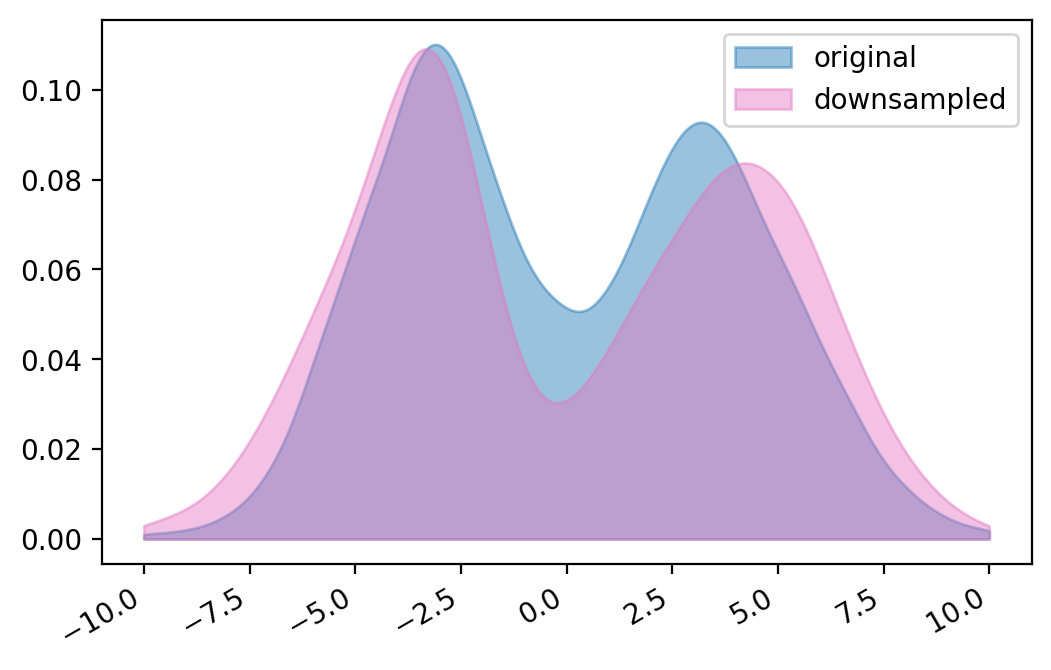

Elapsed time is 0.744031 seconds.
Elapsed time is 0.109772 seconds.


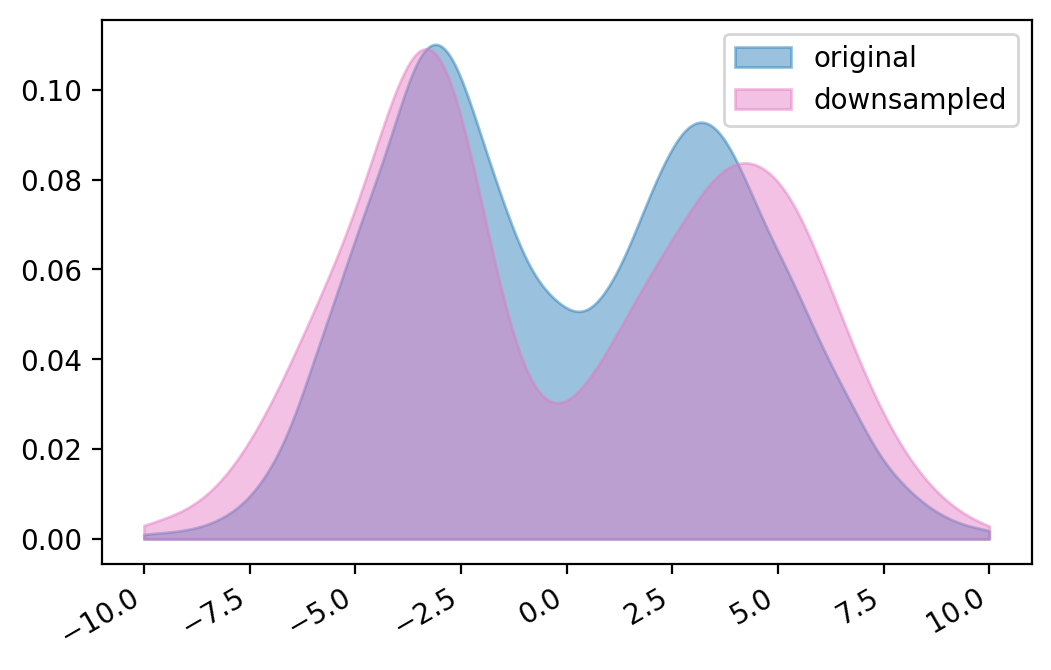

----------------------------------------------------------------
(0, 1, 5, 2, 7875)
Elapsed time is 0.805714 seconds.
Elapsed time is 0.088904 seconds.


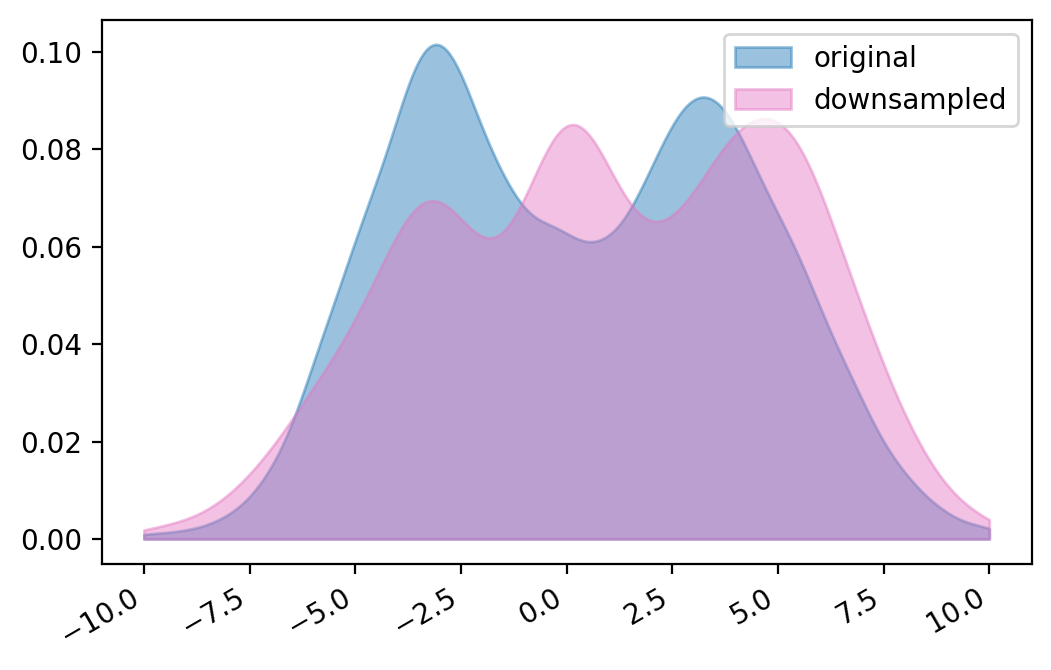

Elapsed time is 0.806777 seconds.
Elapsed time is 0.088660 seconds.


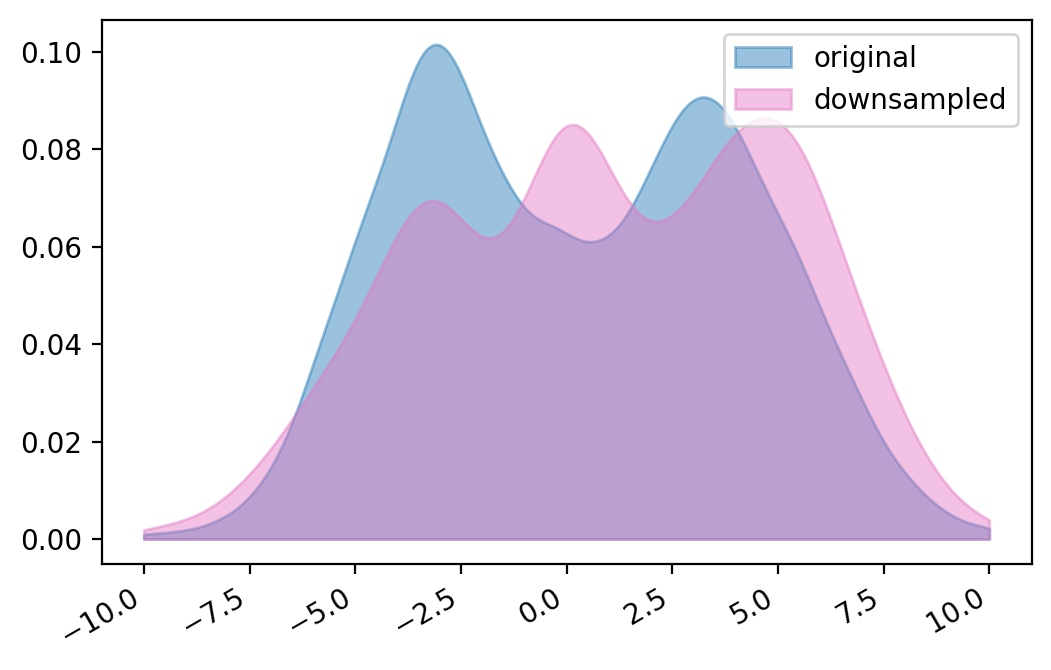

----------------------------------------------------------------
(-5, 2, 3, 1, 10714)
Elapsed time is 0.896315 seconds.
Elapsed time is 0.090950 seconds.


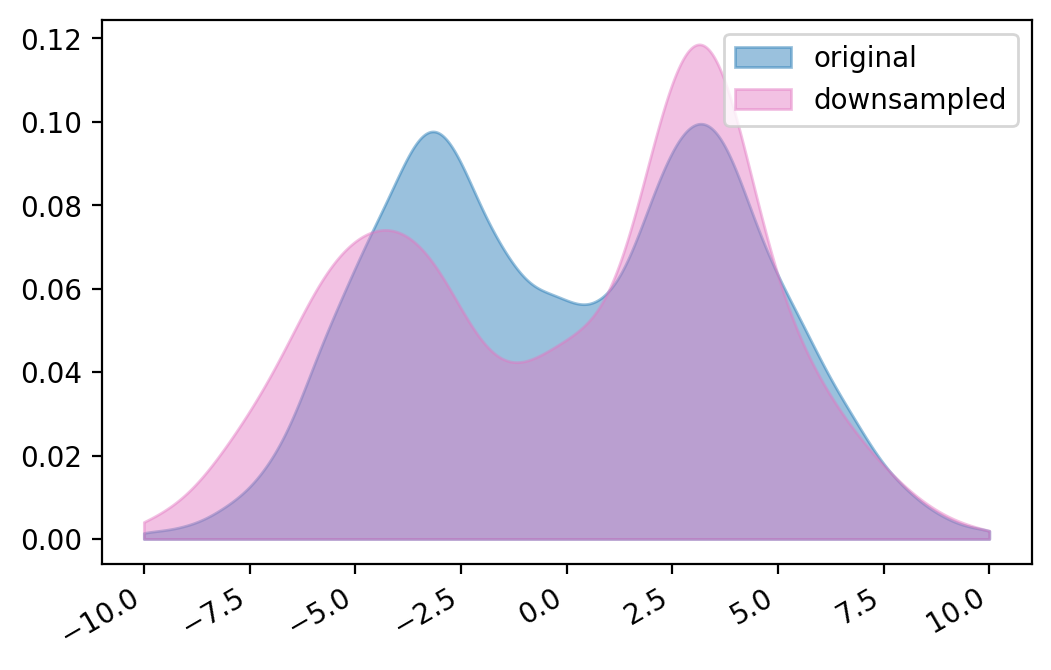

Elapsed time is 0.898461 seconds.
Elapsed time is 0.092080 seconds.


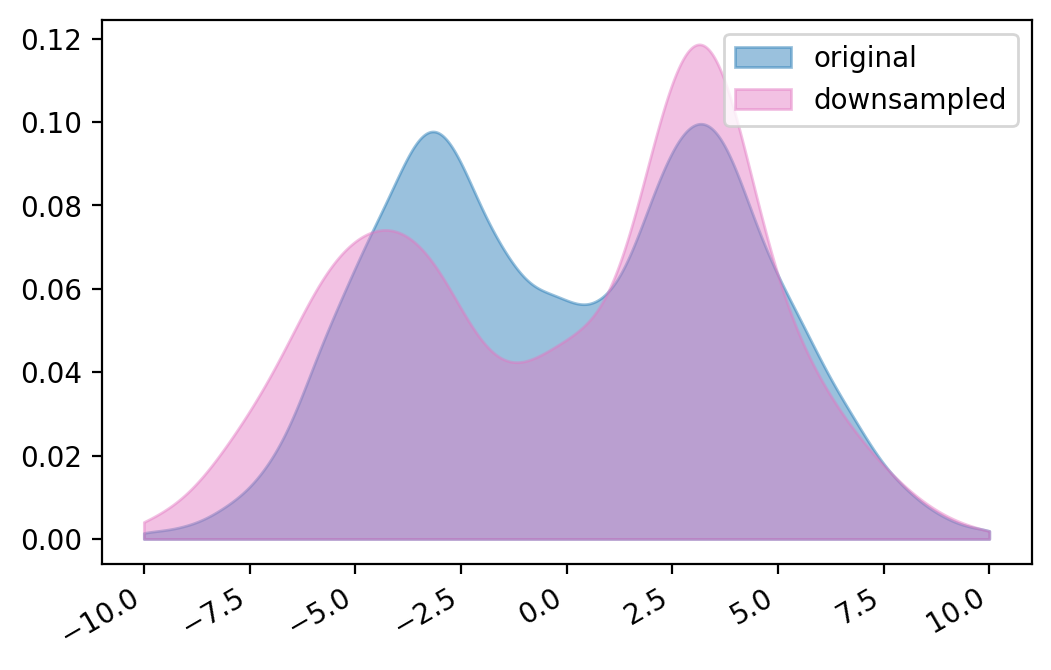

----------------------------------------------------------------
Final Results
Elapsed time is 0.901242 seconds.
Elapsed time is 0.091814 seconds.


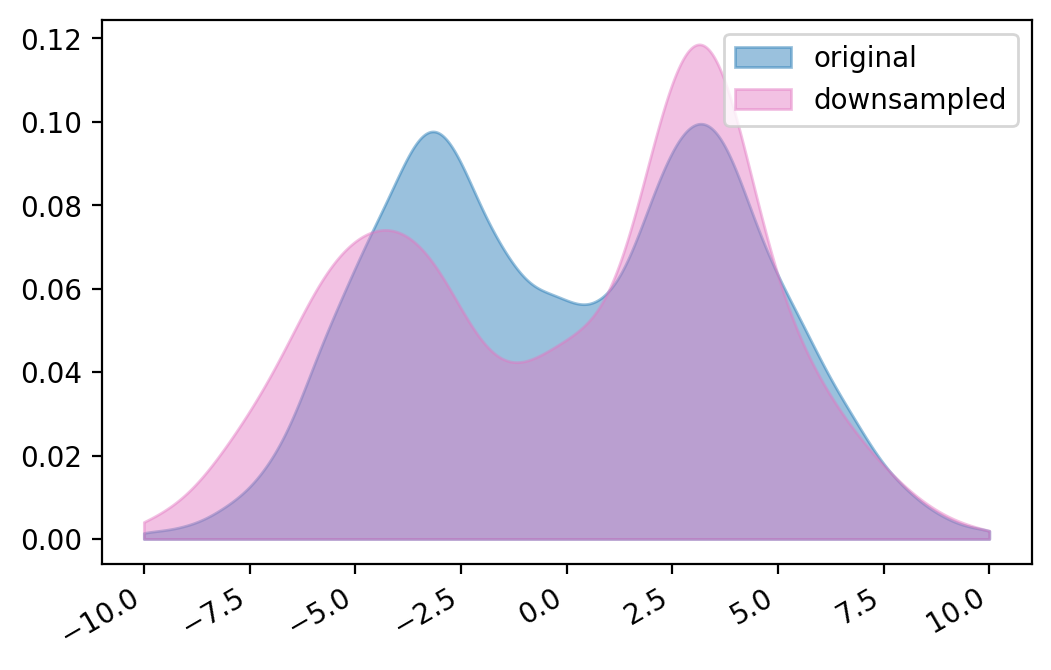

Elapsed time is 0.896452 seconds.
Elapsed time is 0.091082 seconds.


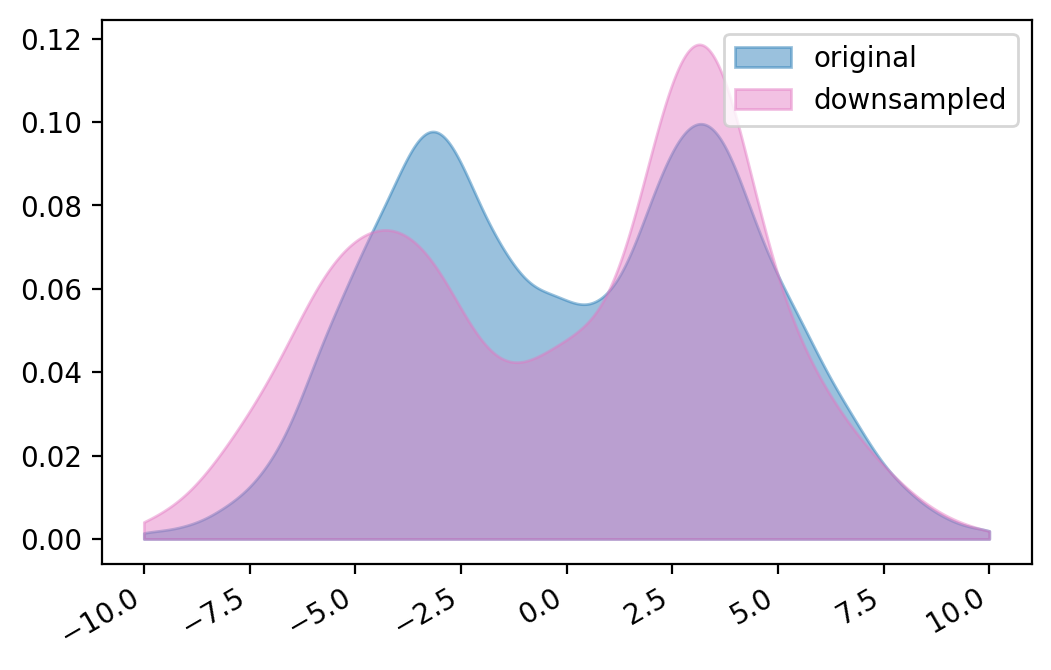

In [10]:
cumulative_data = []
median_downsampled_data = []
mean_downsampled_data = []

for i in range(10):
    data, info = bimodal_dist(random.randint(-5, 0), random.randint(1, 2), random.randint(0, 5), random.randint(1, 2), random.randint(6666, 16666))
    cumulative_data = [*cumulative_data, *data]
    median_downsampled_data = median_downsample(sorted([*median_downsampled_data, *data]), 10000)
    mean_downsampled_data = mean_downsample(sorted([*mean_downsampled_data, *data]), 10000)
    
    print('----------------------------------------------------------------')
    print(info)
    plot_test(cumulative_data, median_downsampled_data)
    plot_test(cumulative_data, mean_downsampled_data)

print('----------------------------------------------------------------')
print('Final Results')
plot_test(cumulative_data, median_downsampled_data)
plot_test(cumulative_data, mean_downsampled_data)

In [5]:
71910110
1000000
666666
100000

71910110

In [4]:
t = TicToc()
t.tic()
data = [random.uniform(-10, 10) for _ in range(11910110)]
print(len(data))
t.toc()

t = TicToc()
t.tic()
sorted_data = sorted(data)
print(len(sorted_data))
t.toc()

t = TicToc()
t.tic()
median_downsampled_data = median_downsample(sorted_data, 100000)
print(len(median_downsampled_data))
t.toc()

t = TicToc()
t.tic()
mean_downsampled_data = mean_downsample(sorted_data, 100000)
print(len(mean_downsampled_data))
t.toc()

11910110
Elapsed time is 2.396566 seconds.
11910110
Elapsed time is 3.192317 seconds.
100085
Elapsed time is 2.508165 seconds.
100085
Elapsed time is 0.276576 seconds.


Elapsed time is 92.522344 seconds.
Elapsed time is 0.857098 seconds.


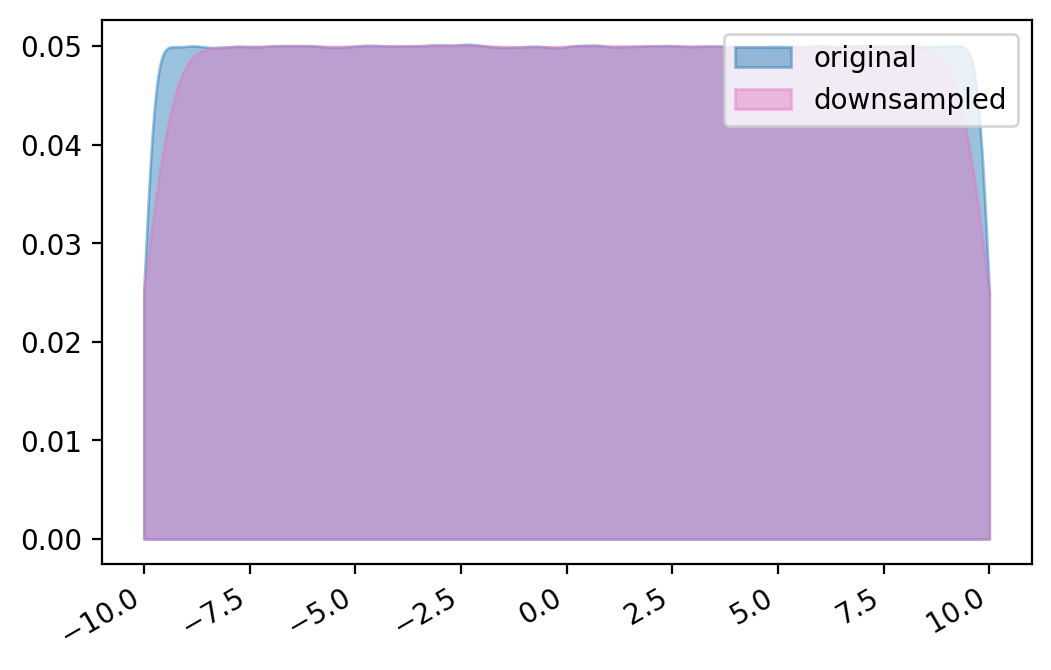

Elapsed time is 91.242766 seconds.
Elapsed time is 0.841867 seconds.


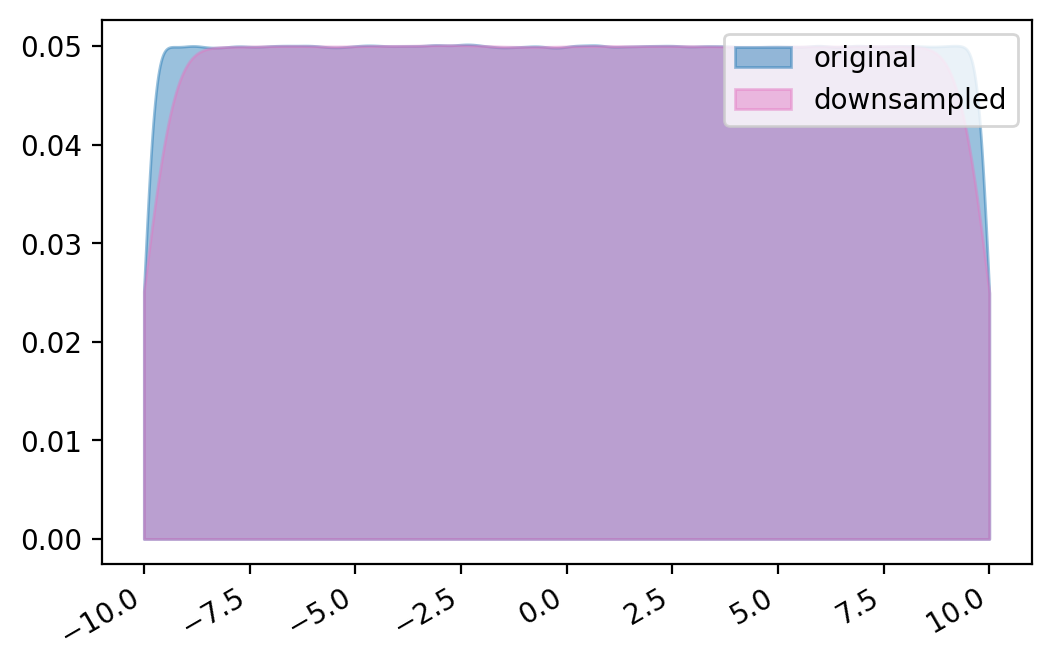

In [5]:
plot_test(data, median_downsampled_data)
plot_test(data, mean_downsampled_data)

In [6]:
# t = TicToc()
# t.tic()
# data = [random.uniform(-10, 10) for _ in range(11910110)]
# print(len(data))
# t.toc()

# t = TicToc()
# t.tic()
# sorted_data = sorted(data)
# print(len(sorted_data))
# t.toc()

t = TicToc()
t.tic()
median_downsampled_data = median_downsample(sorted_data, 10000)
print(len(median_downsampled_data))
t.toc()

t = TicToc()
t.tic()
mean_downsampled_data = mean_downsample(sorted_data, 10000)
print(len(mean_downsampled_data))
t.toc()

10001
Elapsed time is 0.873355 seconds.
10001
Elapsed time is 0.234965 seconds.


Elapsed time is 90.984305 seconds.
Elapsed time is 0.087340 seconds.


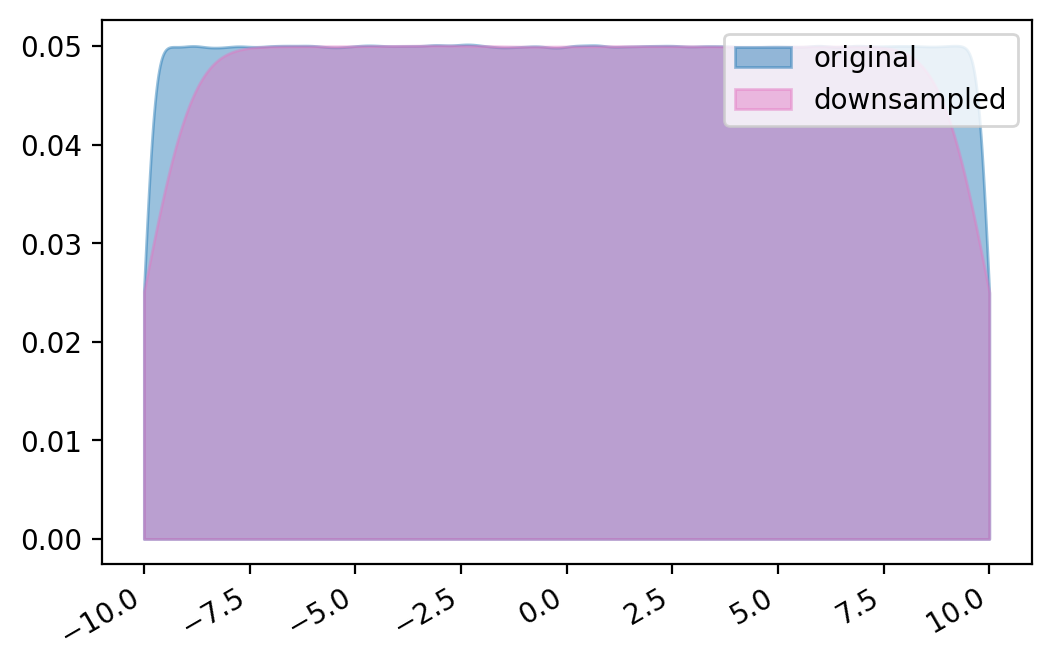

Elapsed time is 91.078974 seconds.
Elapsed time is 0.086967 seconds.


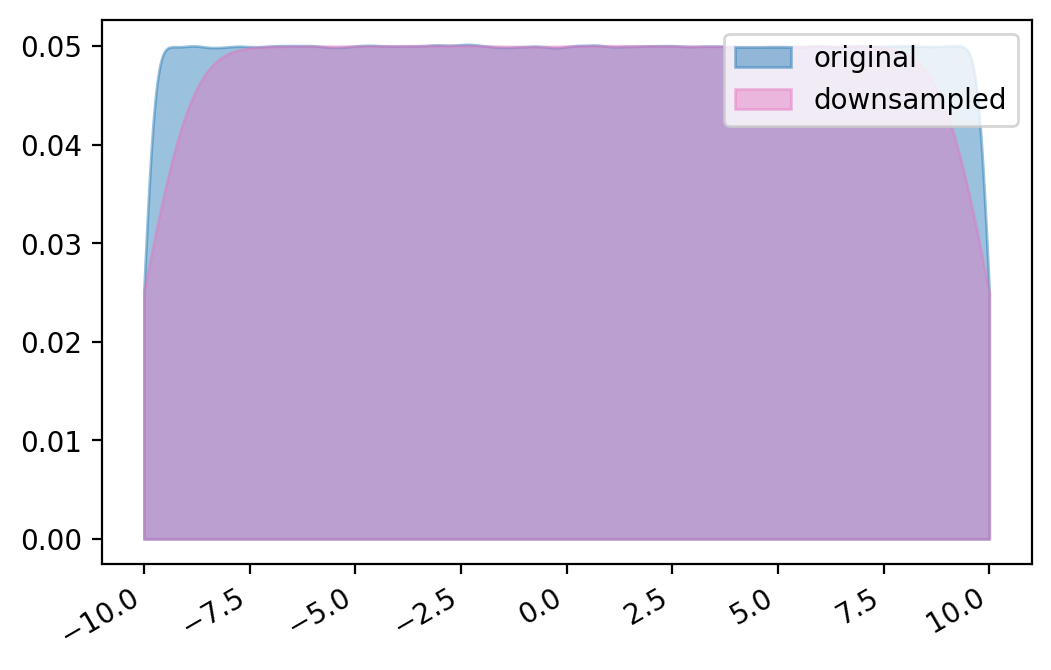

In [7]:
plot_test(data, median_downsampled_data)
plot_test(data, mean_downsampled_data)

In [8]:
t = TicToc()
t.tic()
# 设定参数
size = 11910110
mean1, mean2 = -5, 5
std_dev = 1

# 生成雙峰分佈的隨機數
data1 = np.random.normal(mean1, std_dev, size // 2)
data2 = np.random.normal(mean2, std_dev, size // 2)
data = np.concatenate((data1, data2))

# 將數據限制在 -10 到 10 之間
data = np.clip(data, -10, 10)
t.toc()

t = TicToc()
t.tic()
sorted_data = sorted(data)
print(len(sorted_data))
t.toc()

t = TicToc()
t.tic()
median_downsampled_data = median_downsample(sorted_data, 100000)
print(len(median_downsampled_data))
t.toc()

t = TicToc()
t.tic()
mean_downsampled_data = mean_downsample(sorted_data, 100000)
print(len(mean_downsampled_data))
t.toc()

Elapsed time is 0.387254 seconds.
11910110
Elapsed time is 9.203228 seconds.
100085
Elapsed time is 2.506846 seconds.
100085
Elapsed time is 0.933975 seconds.


Elapsed time is 90.037332 seconds.
Elapsed time is 0.851147 seconds.


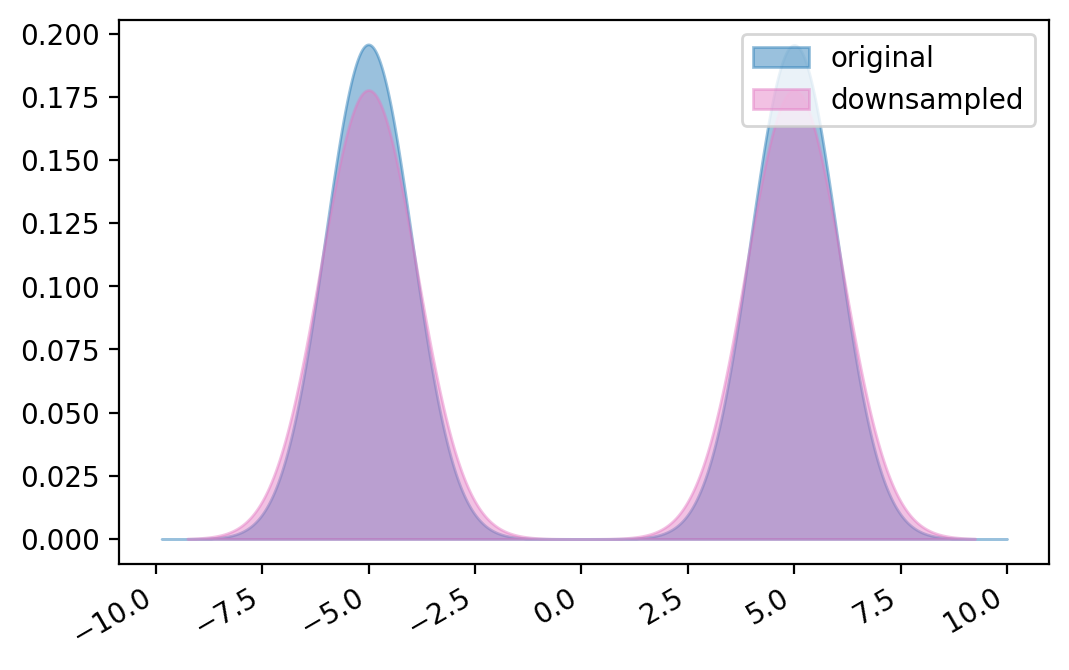

Elapsed time is 90.338982 seconds.
Elapsed time is 0.849492 seconds.


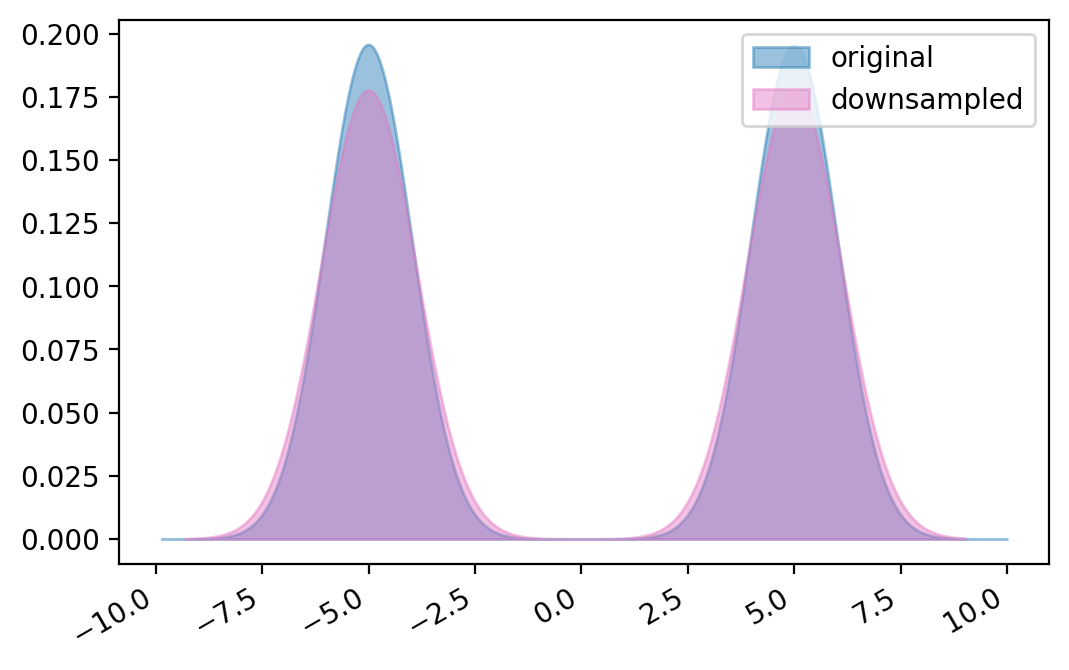

In [9]:
plot_test(data, median_downsampled_data)
plot_test(data, mean_downsampled_data)

In [10]:
# t = TicToc()
# t.tic()
# # 设定参数
# size = 11910110
# mean1, mean2 = -5, 5
# std_dev = 1

# # 生成雙峰分佈的隨機數
# data1 = np.random.normal(mean1, std_dev, size // 2)
# data2 = np.random.normal(mean2, std_dev, size // 2)
# data = np.concatenate((data1, data2))

# # 將數據限制在 -10 到 10 之間
# data = np.clip(data, -10, 10)
# t.toc()

# t = TicToc()
# t.tic()
# sorted_data = sorted(data)
# print(len(sorted_data))
# t.toc()

t = TicToc()
t.tic()
median_downsampled_data = median_downsample(sorted_data, 10000)
print(len(median_downsampled_data))
t.toc()

t = TicToc()
t.tic()
mean_downsampled_data = mean_downsample(sorted_data, 10000)
print(len(mean_downsampled_data))
t.toc()

10001
Elapsed time is 1.044157 seconds.
10001
Elapsed time is 0.909860 seconds.


Elapsed time is 90.730066 seconds.
Elapsed time is 0.087805 seconds.


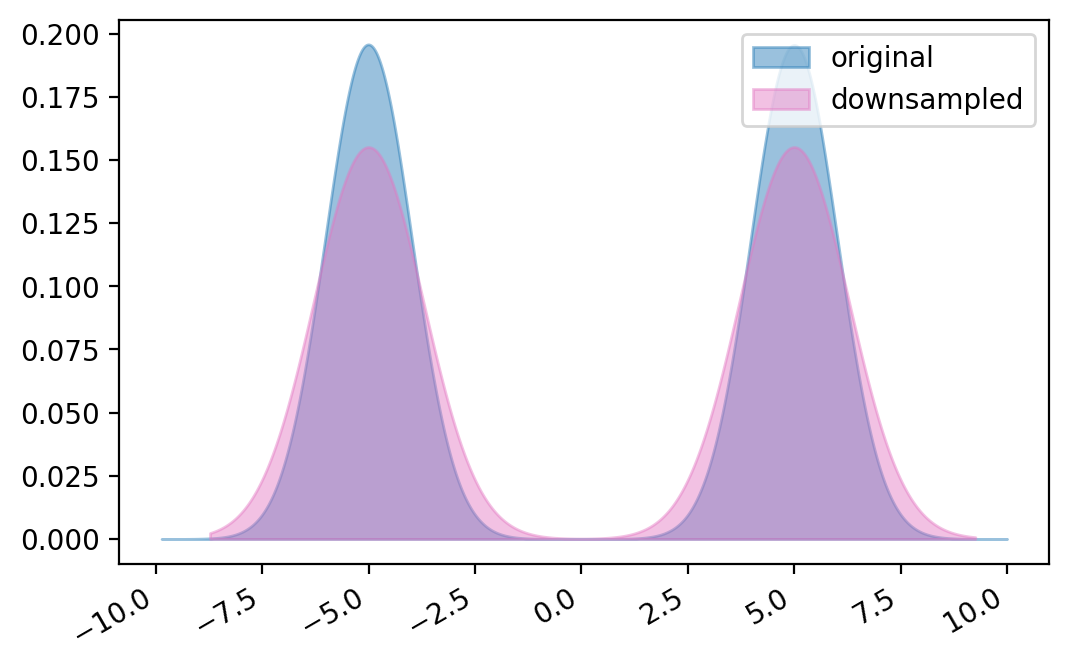

Elapsed time is 90.974193 seconds.
Elapsed time is 0.097694 seconds.


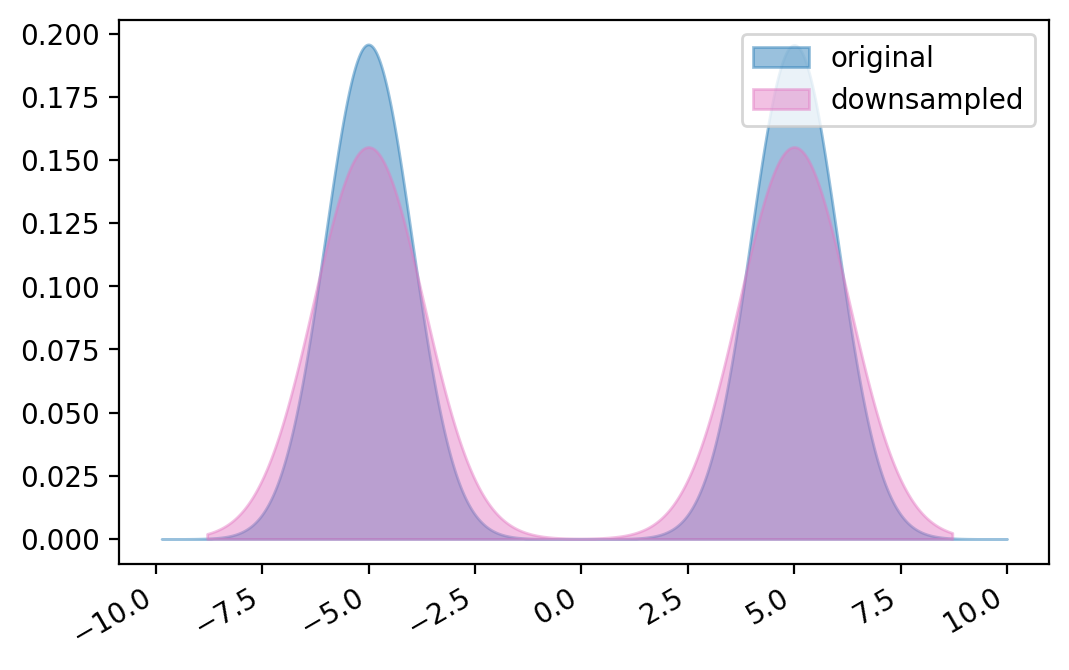

In [11]:
plot_test(data, median_downsampled_data)
plot_test(data, mean_downsampled_data)

In [13]:
# t = TicToc()
# t.tic()
# # 设定参数
# size = 11910110
# mean1, mean2 = -5, 5
# std_dev = 1

# # 生成雙峰分佈的隨機數
# data1 = np.random.normal(mean1, std_dev, size // 2)
# data2 = np.random.normal(mean2, std_dev, size // 2)
# data = np.concatenate((data1, data2))

# # 將數據限制在 -10 到 10 之間
# data = np.clip(data, -10, 10)
# t.toc()

# t = TicToc()
# t.tic()
# sorted_data = sorted(data)
# print(len(sorted_data))
# t.toc()

t = TicToc()
t.tic()
median_downsampled_data = median_downsample(sorted_data, 1000000)
print(len(median_downsampled_data))
t.toc()

t = TicToc()
t.tic()
mean_downsampled_data = mean_downsample(sorted_data, 1000000)
print(len(mean_downsampled_data))
t.toc()

1082738
Elapsed time is 19.555930 seconds.
1082738
Elapsed time is 1.176841 seconds.


Elapsed time is 89.958220 seconds.
Elapsed time is 9.004491 seconds.


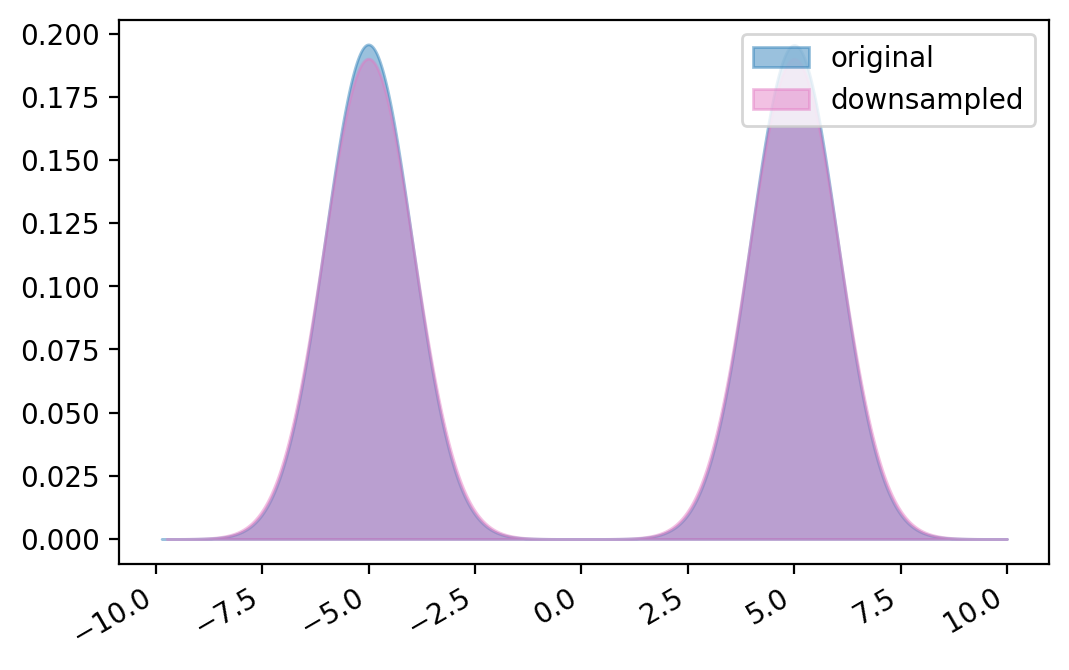

Elapsed time is 90.244275 seconds.
Elapsed time is 9.048186 seconds.


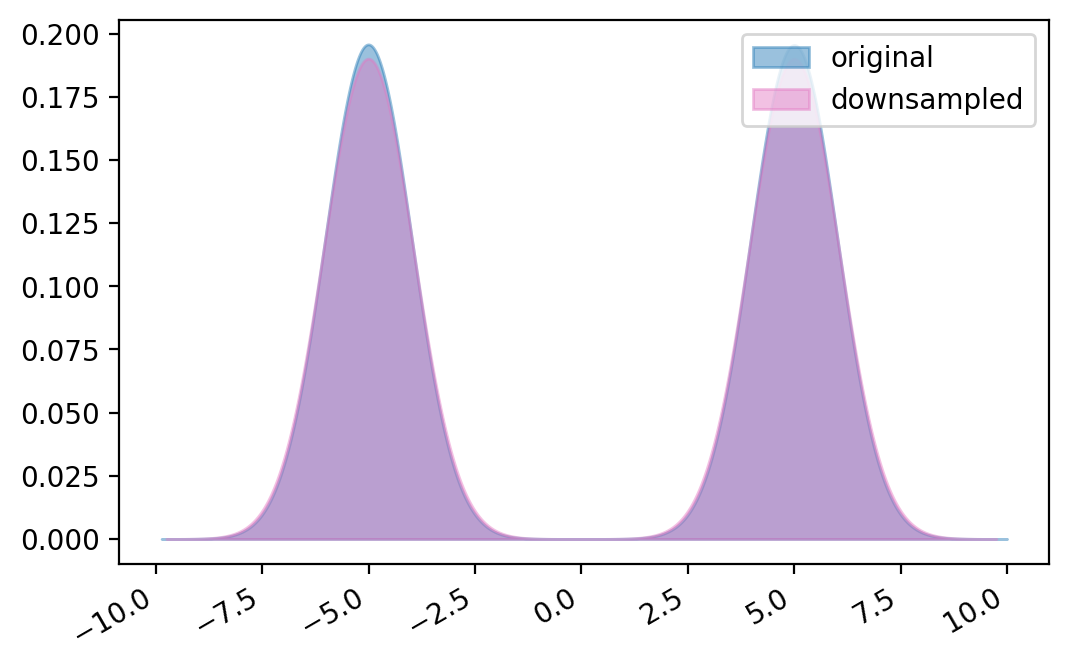

In [14]:
plot_test(data, median_downsampled_data)
plot_test(data, mean_downsampled_data)

In [15]:
import numpy as np

# t = TicToc()
# t.tic()
# # 设定参数
# size = 11910110
# mean1, mean2 = -5, 5
# std_dev = 1

# # 生成雙峰分佈的隨機數
# data1 = np.random.normal(mean1, std_dev, size // 2)
# data2 = np.random.normal(mean2, std_dev, size // 2)
# data = np.concatenate((data1, data2))

# # 將數據限制在 -10 到 10 之間
# data = np.clip(data, -10, 10)
# t.toc()

# t = TicToc()
# t.tic()
# sorted_data = sorted(data)
# print(len(sorted_data))
# t.toc()

t = TicToc()
t.tic()
median_downsampled_data = median_downsample(sorted_data, 666666)
print(len(median_downsampled_data))
t.toc()

t = TicToc()
t.tic()
mean_downsampled_data = mean_downsample(sorted_data, 666666)
print(len(mean_downsampled_data))
t.toc()

700595
Elapsed time is 13.176311 seconds.
700595
Elapsed time is 1.054657 seconds.


Elapsed time is 89.999254 seconds.
Elapsed time is 5.859886 seconds.


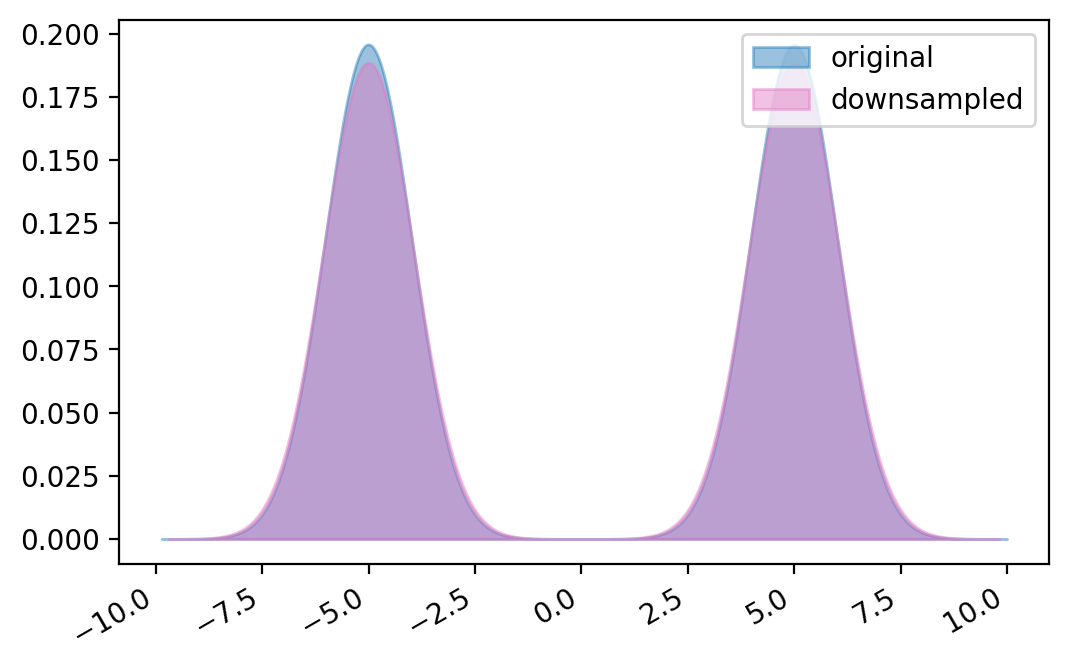

Elapsed time is 90.784943 seconds.
Elapsed time is 6.032116 seconds.


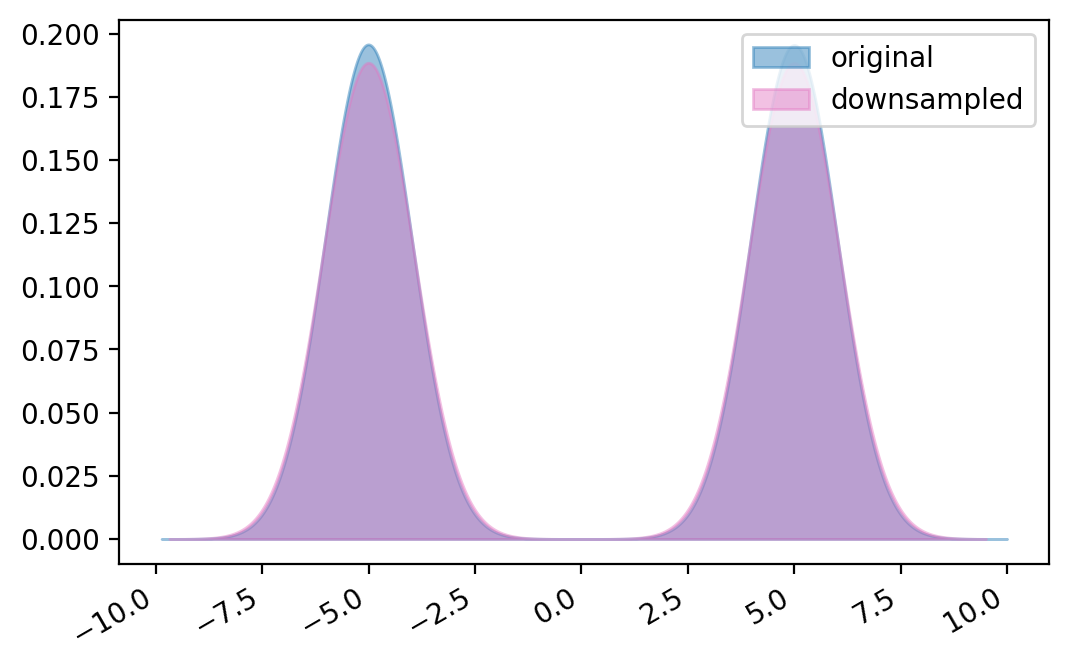

In [16]:
plot_test(data, median_downsampled_data)
plot_test(data, mean_downsampled_data)